Import Libraries

In [1]:
# importing the required libraries
import pandas as pd
# Importing the required libraries
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import warnings

In [2]:
# reading the data
df = pd.read_csv('C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Dataset/Nour Moustafa/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')

In [ ]:
# Sample for faster run time
data = df.sample(n=1000, random_state=123)

#Use the full Dataset
#data = df

# Drop the 'id' and 'label' columns
data = data.drop(columns=['id', 'label'])

# 'attack_cat' is the target column
# Separate features and target
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded features to a DataFrame
X_encoded_data = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded_data], axis=1)

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Ensuring the number of samples in X and y are the same
X, y = X[:len(y)], y[:len(X)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the model
random_forest_model = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest_model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00         4
      Backdoor       0.00      0.00      0.00         5
           DoS       0.18      0.15      0.17        13
      Exploits       0.63      0.70      0.67        44
       Fuzzers       0.58      0.56      0.57        25
       Generic       0.95      0.95      0.95        41
        Normal       0.86      0.88      0.87        57
Reconnaissance       0.50      0.60      0.55        10
     Shellcode       0.00      0.00      0.00         1

      accuracy                           0.71       200
     macro avg       0.41      0.43      0.42       200
  weighted avg       0.69      0.71      0.70       200

Confusion Matrix:
 [[ 0  0  1  0  0  0  2  1  0]
 [ 0  0  1  4  0  0  0  0  0]
 [ 0  4  2  5  0  0  0  2  0]
 [ 0  0  6 31  2  1  1  3  0]
 [ 0  0  0  5 14  1  4  0  1]
 [ 0  0  0  0  2 39  0  0  0]
 [ 0  0  0  2  5  0 50  0  0]
 

c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

100%|===================| 19942/20000 [02:07<00:00]        

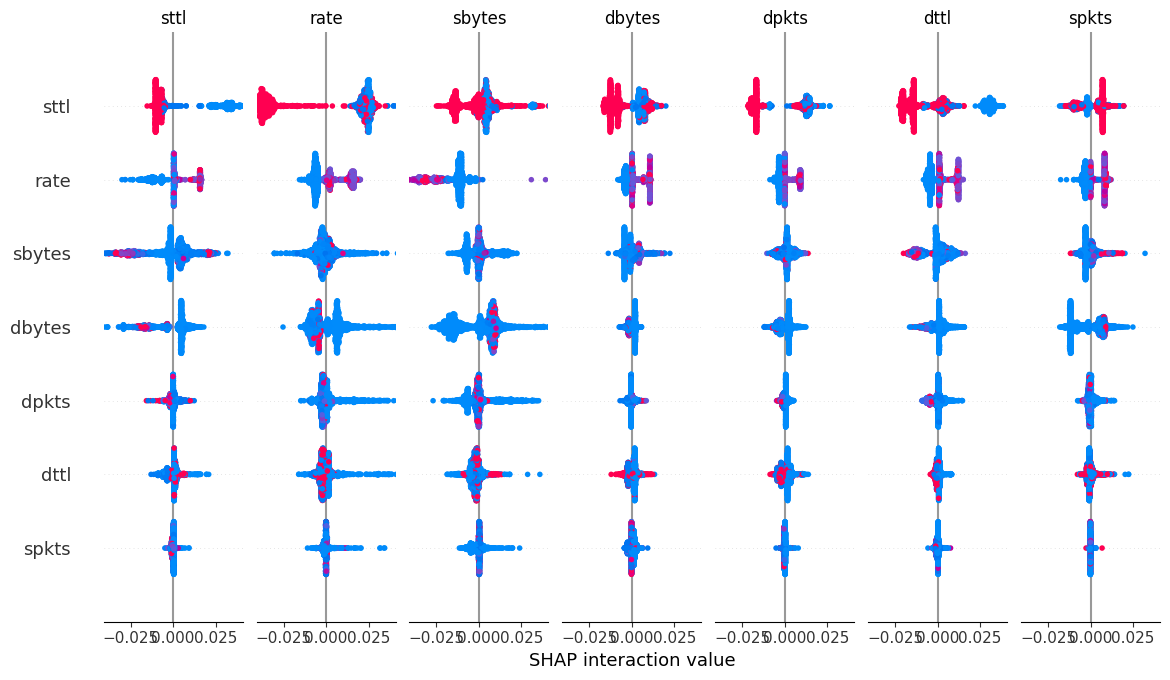

KeyError: 0

In [ ]:
# SHAP explanation
# Load the SHAP explainer
explainer = shap.Explainer(random_forest_model, X_train)

# Compute SHAP values with additivity check disabled
shap_values = explainer(X_test, check_additivity=False)

# Plot summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Convert X_test to DataFrame for single prediction explanation (force plot)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Plot single prediction explanation (force plot)

# Plot the SHAP values for a single prediction
#shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=encoder.get_feature_names_out(categorical_cols).tolist() + X.columns.tolist())

# Bar plot for feature importance
shap.plots.bar(shap_values)

In [18]:
# SHAP explanation
explainer = shap.TreeExplainer(random_forest_model)
explanation = explainer(X_test)

# Extract SHAP values and base values
shap_values = explanation.values
base_values = explanation.base_values

# Ensure the SHAP values add up to marginal predictions
# Adjust the shapes to be compatible
max_error = np.abs(shap_values.sum(axis=1) + base_values - y_pred).max()
print("Max error:", max_error)

# Optional: Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

ValueError: operands could not be broadcast together with shapes (2000,10) (2000,) 